In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
transform = transforms.ToTensor()
train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.44MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.55MB/s]


In [3]:
train_loader = DataLoader(train, batch_size=64, shuffle=True)
test_loader = DataLoader(test, batch_size=1000, shuffle=False)

In [12]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

In [13]:
# Check the type of data
print(f"Images type: {type(images)}")
print(f"Labels type: {type(labels)}")

# Check the tensor dtype and shape
print(f"Images dtype: {images.dtype}")
print(f"Images shape: {images.shape}")  # should be [64, 1, 28, 28]
print(f"Labels dtype: {labels.dtype}")
print(f"Labels shape: {labels.shape}")  # should be [64]

Images type: <class 'torch.Tensor'>
Labels type: <class 'torch.Tensor'>
Images dtype: torch.float32
Images shape: torch.Size([64, 1, 28, 28])
Labels dtype: torch.int64
Labels shape: torch.Size([64])


In [21]:
for  label in labels:
    print(label)


tensor(0)
tensor(1)
tensor(6)
tensor(9)
tensor(1)
tensor(3)
tensor(6)
tensor(5)
tensor(3)
tensor(3)
tensor(7)
tensor(9)
tensor(5)
tensor(0)
tensor(8)
tensor(2)
tensor(3)
tensor(6)
tensor(0)
tensor(8)
tensor(6)
tensor(4)
tensor(0)
tensor(5)
tensor(6)
tensor(1)
tensor(3)
tensor(0)
tensor(1)
tensor(2)
tensor(3)
tensor(1)
tensor(3)
tensor(3)
tensor(1)
tensor(8)
tensor(7)
tensor(2)
tensor(9)
tensor(5)
tensor(1)
tensor(3)
tensor(1)
tensor(3)
tensor(0)
tensor(0)
tensor(2)
tensor(4)
tensor(7)
tensor(3)
tensor(1)
tensor(7)
tensor(8)
tensor(0)
tensor(1)
tensor(8)
tensor(2)
tensor(2)
tensor(0)
tensor(1)
tensor(5)
tensor(8)
tensor(9)
tensor(9)


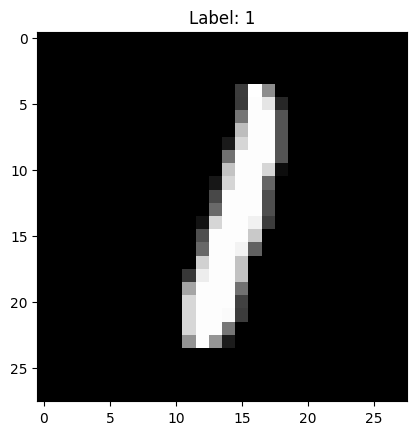

In [16]:
import matplotlib.pyplot as plt

# Show the first image in the batch
plt.imshow(images[1].squeeze(), cmap='gray')
plt.title(f"Label: {labels[1].item()}")
plt.show()

In [4]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),  # 28x28 -> 28x28
            nn.ReLU(),
            nn.MaxPool2d(2)                 # 28x28 -> 14x14
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16*14*14, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

In [5]:
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [6]:
for epoch in range(5):
    for images, labels in train_loader:
        output = model(images)
        loss = criterion(output, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 0.1917
Epoch 2, Loss: 0.0643
Epoch 3, Loss: 0.0894
Epoch 4, Loss: 0.1039
Epoch 5, Loss: 0.0120


In [8]:
test_loader

In [7]:
correct = 0
total = 0
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 97.95%
